In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("TrojanDetection (3).csv")

In [50]:
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [51]:
# prompt: drop columns which have more than 80% data as zero

# get the percentage of zeros in each column
zeros_percent = (data == 0).mean(axis=0) * 100

# select columns with more than 80% zeros
drop_columns = zeros_percent[zeros_percent > 60].index.tolist()

# drop the selected columns
data1 = data.drop(labels=drop_columns, axis=1)

# print the updated data
data1.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17-07-2017 01:18,10743584,4,4,...,168.000000,100,4,372,4,672,65535,511,20,Trojan
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17-07-2017 10:25,254217,6,7,...,749.428571,204,6,3191,7,5246,-1,-1,20,Trojan
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30-06-2017 07:16,1023244,1,1,...,179.000000,32,1,30,1,179,-1,-1,32,Benign
3,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13-07-2017 03:48,286483,1,1,...,106.000000,20,1,40,1,106,-1,-1,20,Trojan
4,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05-07-2017 10:47,65633087,12,10,...,562.200000,392,12,767,10,5622,65535,79,32,Benign


In [52]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'] 
label_encoder = LabelEncoder()

for column in categorical_columns:
    data1.loc[:, column] = label_encoder.fit_transform(data1[column])

In [53]:
data1['Class'] = data1['Class'].astype(str).str.lower()
data2 = data1.copy()
data2['Class'] = data2['Class'].apply(lambda x: 1 if x == 'trojan' else 0)
data2.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Class
0,46111,7,49975,352,80,6,1967,10743584,4,4,...,168.000000,100,4,372,4,672,65535,511,20,1
1,74905,7,49169,895,443,17,2114,254217,6,7,...,749.428571,204,6,3191,7,5246,-1,-1,20,1
2,9217,7,37749,7,53,17,2222,1023244,1,1,...,179.000000,32,1,30,1,179,-1,-1,32,0
3,10418,7,41352,7,53,17,1641,286483,1,1,...,106.000000,20,1,40,1,106,-1,-1,20,1
4,20763,5,44353,220,443,6,1011,65633087,12,10,...,562.200000,392,12,767,10,5622,65535,79,32,0


In [141]:
X = data2.drop('Class', axis=1)
y = data2['Class']

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [56]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = scaler.get_feature_names_out())

X_scaled.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
0,-0.254681,-0.301851,0.615201,-0.551042,-0.374990,-0.505654,1.255342,-0.038628,-0.092527,-0.055528,...,0.166762,-0.041883,-0.110092,-0.092527,-0.072645,-0.055528,-0.063037,1.403291,-0.153687,-1.172879
1,0.846472,-0.301851,0.571481,0.048341,-0.351039,1.916993,1.489244,-0.494134,-0.025086,-0.027333,...,3.218552,1.776236,0.007339,-0.025086,0.392864,-0.027333,-0.032898,-0.743407,-0.221689,-1.172879
2,-1.665597,-0.301851,-0.047966,-0.931866,-0.376772,1.916993,1.661090,-0.460739,-0.193689,-0.083723,...,-0.271360,-0.007486,-0.186874,-0.193689,-0.129121,-0.083723,-0.066285,-0.743407,-0.221689,0.631082
3,-1.619668,-0.301851,0.147469,-0.931866,-0.376772,1.916993,0.736620,-0.492733,-0.193689,-0.083723,...,-0.201817,-0.235756,-0.200423,-0.193689,-0.127469,-0.083723,-0.066766,-0.743407,-0.221689,-1.172879
4,-1.224050,-0.307995,0.310250,-0.696749,-0.351039,-0.505654,-0.265817,2.344980,0.177238,0.000862,...,-0.035493,1.190775,0.219619,0.177238,-0.007418,0.000862,-0.030421,1.403291,-0.211064,0.631082


In [57]:
# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(X_scaled)
X_filtered = pd.DataFrame(X_filtered,columns = constant_filter.get_feature_names_out())

X_filtered.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
0,-0.254681,-0.301851,0.615201,-0.551042,-0.374990,-0.505654,1.255342,-0.038628,-0.092527,-0.055528,...,0.166762,-0.041883,-0.110092,-0.092527,-0.072645,-0.055528,-0.063037,1.403291,-0.153687,-1.172879
1,0.846472,-0.301851,0.571481,0.048341,-0.351039,1.916993,1.489244,-0.494134,-0.025086,-0.027333,...,3.218552,1.776236,0.007339,-0.025086,0.392864,-0.027333,-0.032898,-0.743407,-0.221689,-1.172879
2,-1.665597,-0.301851,-0.047966,-0.931866,-0.376772,1.916993,1.661090,-0.460739,-0.193689,-0.083723,...,-0.271360,-0.007486,-0.186874,-0.193689,-0.129121,-0.083723,-0.066285,-0.743407,-0.221689,0.631082
3,-1.619668,-0.301851,0.147469,-0.931866,-0.376772,1.916993,0.736620,-0.492733,-0.193689,-0.083723,...,-0.201817,-0.235756,-0.200423,-0.193689,-0.127469,-0.083723,-0.066766,-0.743407,-0.221689,-1.172879
4,-1.224050,-0.307995,0.310250,-0.696749,-0.351039,-0.505654,-0.265817,2.344980,0.177238,0.000862,...,-0.035493,1.190775,0.219619,0.177238,-0.007418,0.000862,-0.030421,1.403291,-0.211064,0.631082


In [58]:
# Calculate mutual information on the original features
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
print("Mutual Information of each feature:")
print(mutual_info_series.sort_values(ascending=False))

Mutual Information of each feature:
 Timestamp                      0.690356
Flow ID                         0.480452
 Source IP                      0.128687
 Destination IP                 0.122611
 Source Port                    0.107037
 Packet Length Mean             0.054612
 Average Packet Size            0.054168
 Packet Length Variance         0.053286
 Packet Length Std              0.052925
 Total Length of Bwd Packets    0.050895
 Avg Bwd Segment Size           0.050594
 Bwd Packet Length Mean         0.050570
 Subflow Bwd Bytes              0.049759
 Fwd Packet Length Mean         0.047034
 Avg Fwd Segment Size           0.046852
 Flow Duration                  0.044568
Total Length of Fwd Packets     0.044401
 Flow IAT Max                   0.043972
 Subflow Fwd Bytes              0.043336
Init_Win_bytes_forward          0.042327
 Fwd Packet Length Max          0.040359
 Flow IAT Mean                  0.039256
 Flow Packets/s                 0.038060
Fwd Packets/s        

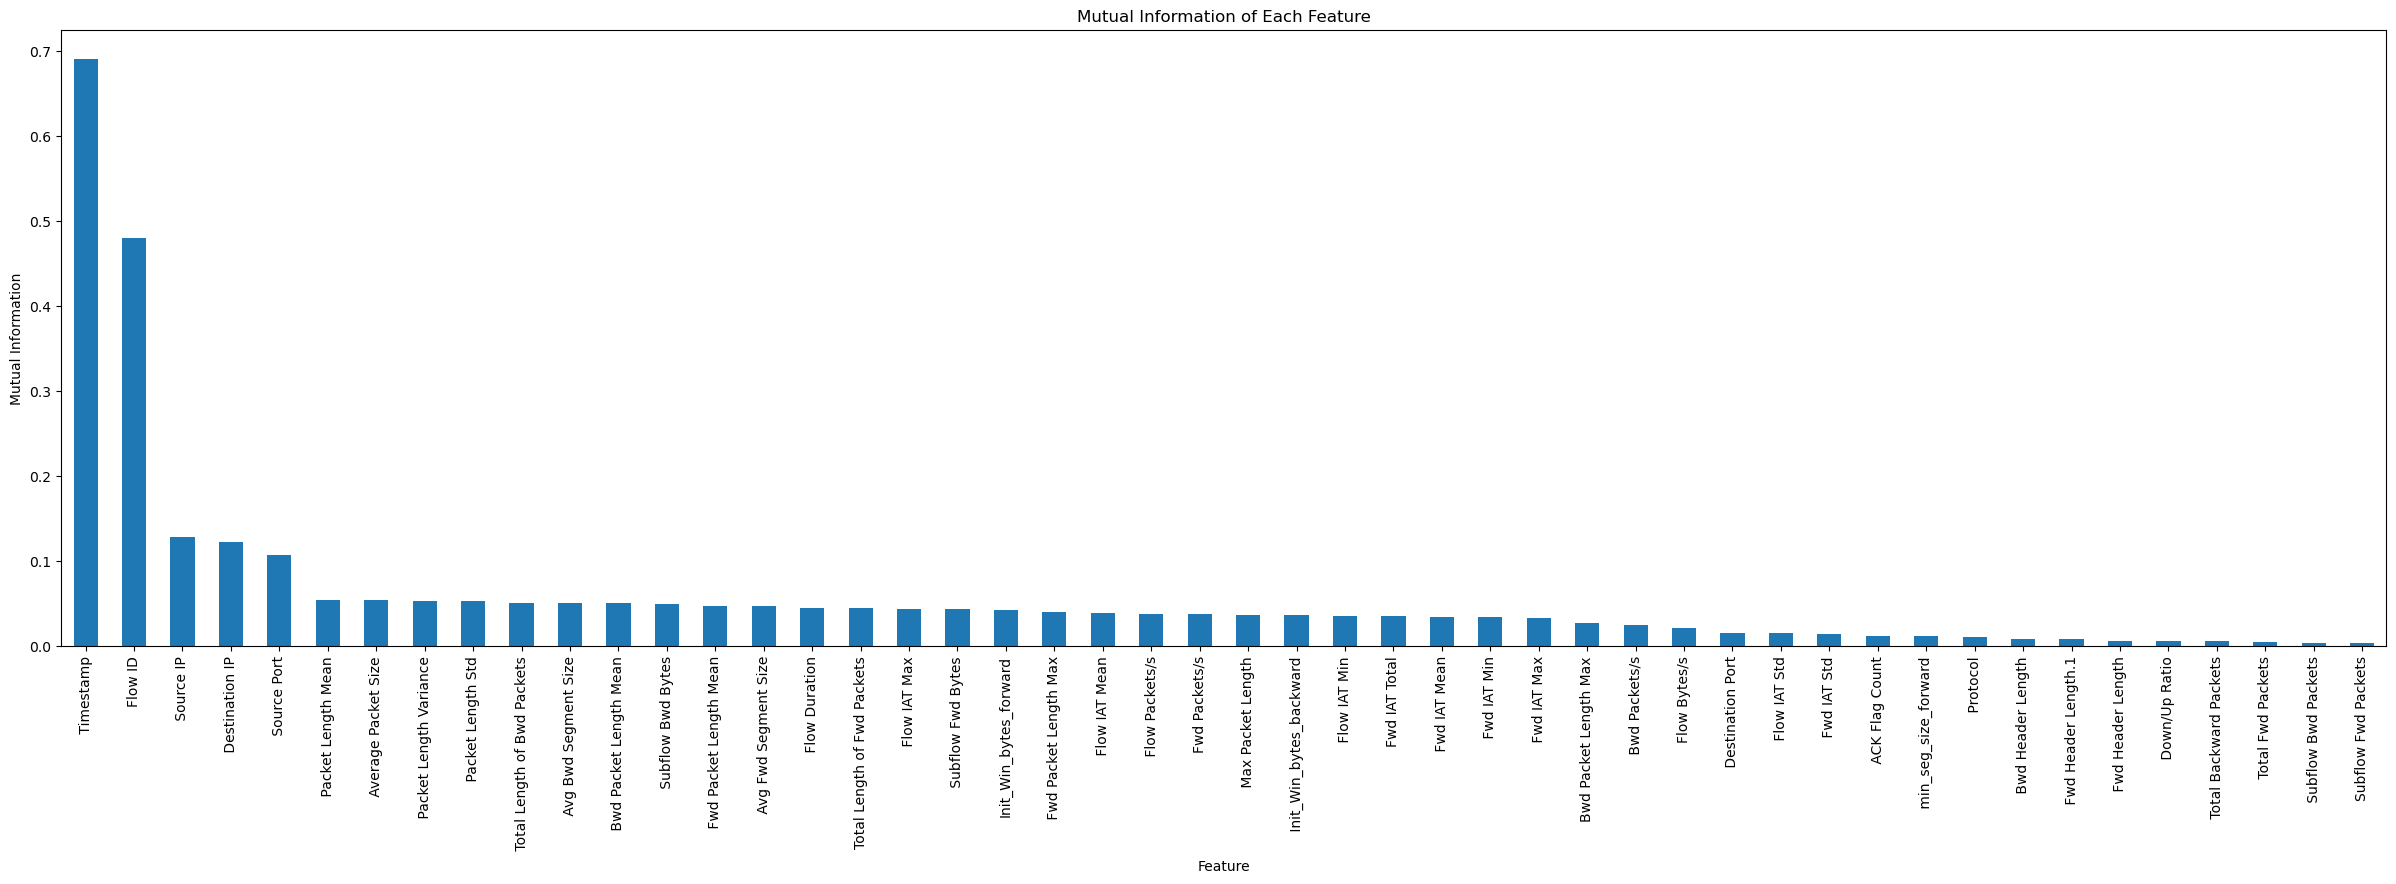

In [59]:
import matplotlib.pyplot as plt
mutual_info_series_sorted = mutual_info_series.sort_values(ascending=False)

plt.figure(figsize=(30, 8))
mutual_info_series_sorted.plot.bar()
plt.title('Mutual Information of Each Feature')
plt.ylabel('Mutual Information')
plt.xlabel('Feature')
plt.show()

In [167]:
from sklearn.feature_selection import SelectKBest,f_classif
# Feature selection using SelectKBest with mutual_info_classif
k_best_features = 20  # Adjust the number of features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k_best_features)
X_selected = selector.fit_transform(X, y)


In [170]:
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)
print(len(selected_features))




Selected Features: Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Timestamp', ' Flow Duration', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward'],
      dtype='object')
20


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [173]:
print("No of samples in Training: ", X_train.shape[0])
print("No of samples in Testing: ", X_test.shape[0])

No of samples in Training:  124237
No of samples in Testing:  53245


In [180]:
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42) #50 trees (estimators). The n_estimators parameter controls how many trees will be used in the forest.
rf_classifier.fit(X_train,y_train)
rf_classifier.score(X_test,y_test)

0.9995116912386139

In [181]:
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

In [182]:
import seaborn as sns
import matplotlib as mpl

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Assuming y_test and y_pred are your test labels and predictions, and y_pred_proba are the predicted probabilities
accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
# print("Classification Report:\n", report)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("classes: ",rf_classifier.classes_)

Accuracy: 0.9995116912386139
ROC AUC Score: 0.9999988312623005
Confusion Matrix:
 [[26074     0]
 [   26 27145]]
classes:  [0 1]


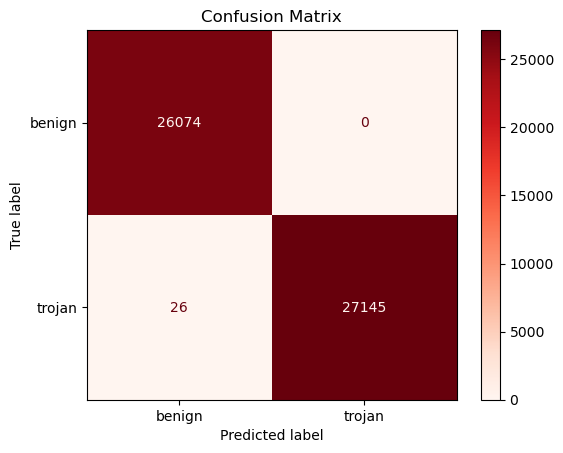

In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming rf_classifier is your trained classifier and X_test, y_test are your test data and labels
disp = ConfusionMatrixDisplay.from_estimator(
    rf_classifier, X_test, y_test, cmap='Reds',display_labels = ['benign','trojan'] 
)
plt.title('Confusion Matrix')
plt.show()


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
import pandas as pd
data = pd.read_csv('TrojanDetection (3).csv')
data.drop(columns=data.columns[0], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'] 
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [5]:
data['Class'] = data['Class'].map({'Benign': 0, 'Trojan': 1})

In [6]:
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,46111,7,49975,352,80,6,1967,10743584,4,4,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,74905,7,49169,895,443,17,2114,254217,6,7,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,9217,7,37749,7,53,17,2222,1023244,1,1,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,10418,7,41352,7,53,17,1641,286483,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,20763,5,44353,220,443,6,1011,65633087,12,10,...,32,322594.0,0.0,322594,322594,60306983.0,0.0,60306983,60306983,0


In [7]:
# Drop columns not used for training
X = data.drop(columns=['Class'])
y = data['Class']

In [9]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(X_scaled)

In [12]:
from sklearn.feature_selection import SelectKBest,f_classif
k_best_features = 20 # Example: 16 is a perfect square (4x4)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = selector.fit_transform(X_filtered, y)

In [13]:
# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

In [14]:
# Print selected features
print("Selected features:", selected_features)

Selected features: Index(['Flow ID', ' Destination IP', ' Timestamp', ' Flow Duration',
       ' Fwd Packet Length Max', ' Fwd Packet Length Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd Header Length',
       ' Bwd Header Length', ' RST Flag Count', ' Fwd Avg Bulk Rate',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes'],
      dtype='object')


In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [18]:
# Reshape data for CNN
import numpy as np
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1).astype('float32')
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1).astype('float32')
y_train_cnn = to_categorical(np.array(y_train), num_classes=2)
y_test_cnn = to_categorical(np.array(y_test), num_classes=2)

In [19]:
# Define the CNN model with additional layers, batch normalization, and a different optimizer
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv1D(32, 2, activation='relu'))
cnn_model.add(Conv1D(16, 2, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(2, activation='sigmoid'))


C:\Users\YanaAbhilasha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.9205 - loss: 0.2239 - val_accuracy: 0.9838 - val_loss: 0.0593
Epoch 2/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9765 - loss: 0.0758 - val_accuracy: 0.9846 - val_loss: 0.0494
Epoch 3/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9825 - loss: 0.0586 - val_accuracy: 0.9893 - val_loss: 0.0380
Epoch 4/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9858 - loss: 0.0506 - val_accuracy: 0.9877 - val_loss: 0.0380
Epoch 5/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9859 - loss: 0.0470 - val_accuracy: 0.9919 - val_loss: 0.0326
Epoch 6/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9865 - val_loss: 0.0388
Epoch 7/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9871 - loss: 0.0429 - val_accuracy: 0.9892 - val_loss: 0.0326
Epoch 8/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9871 -

In [22]:
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print("Test Accuracy:", test_accuracy)

1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0278
Test Accuracy: 0.9915767312049866
